<center><h1>Tang_Lin_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

- Name: Tang Lin
- Github Username: MeLinOrDoreen
- USC ID: 9012859074

### (a) Download Data

Package imports

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import arff
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [21]:
# to surpress warnings
import warnings
warnings.filterwarnings("ignore")

Get the Vertebral Column Data Set

In [22]:
data_2C, meta = arff.loadarff('../Data/column_2C_weka.arff')
df_2C = pd.DataFrame(data_2C)

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

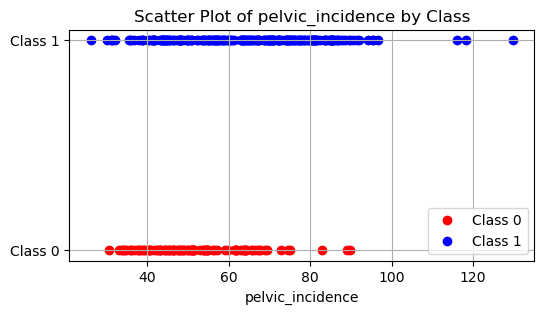

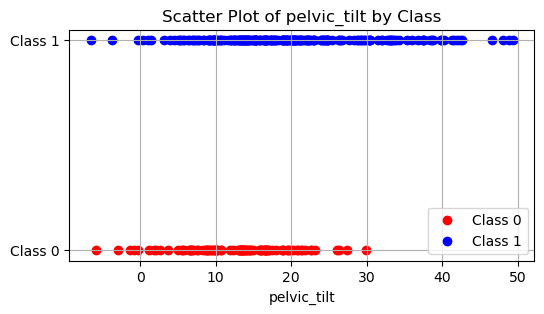

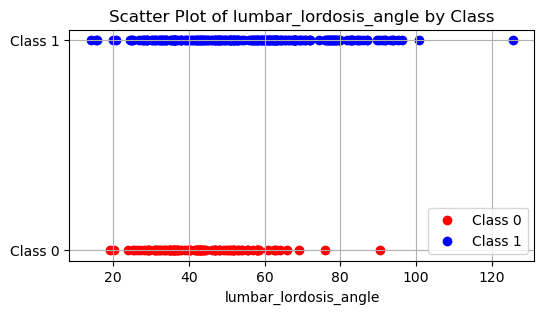

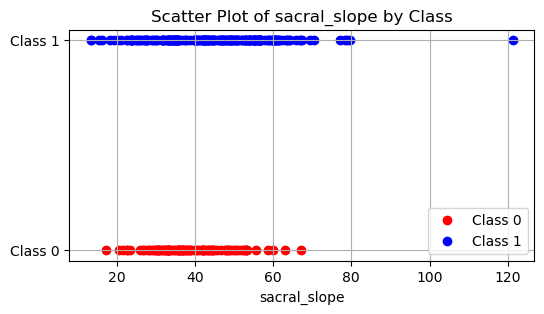

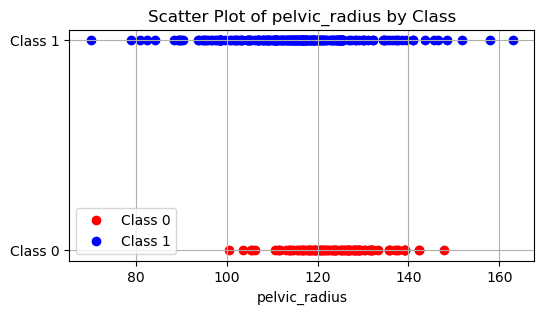

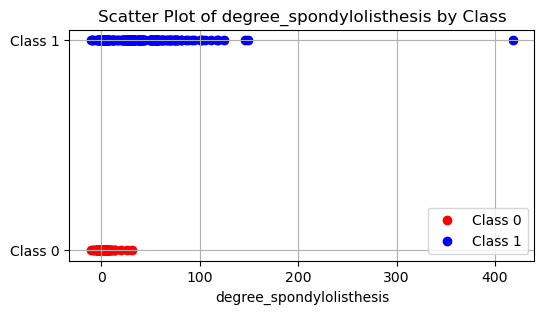

In [23]:
# covert labels (class) to 0 and 1 before drawing plots
df_2C['class'] = df_2C['class'].str.decode('utf-8') # change classes into string type
label_dictionary = {'Normal': 0, 'Abnormal': 1}
df_2C['label'] = df_2C['class'].map(label_dictionary)

# Separate the data by class
class_0_data = df_2C[df_2C['label'] == 0]
class_1_data = df_2C[df_2C['label'] == 1]

# Iterate through each independent variable and create a scatter plot
for variable in df_2C.columns[:-2]:  # Exclude the 'class' and 'label' column
    plt.figure(figsize=(6, 3))
    
    # Scatter plot for Class 0 (use color 'red')
    plt.scatter(class_0_data[variable], [0] * len(class_0_data), c='red', label='Class 0')
    
    # Scatter plot for Class 1 (use color 'blue')
    plt.scatter(class_1_data[variable], [1] * len(class_1_data), c='blue', label='Class 1')
    
    plt.xlabel(variable)
    plt.yticks([0, 1], ['Class 0', 'Class 1'])  # Set y-axis labels
    plt.title(f'Scatter Plot of {variable} by Class')
    plt.legend()
    plt.grid(True)
    
    plt.show()


#### ii. Boxplots

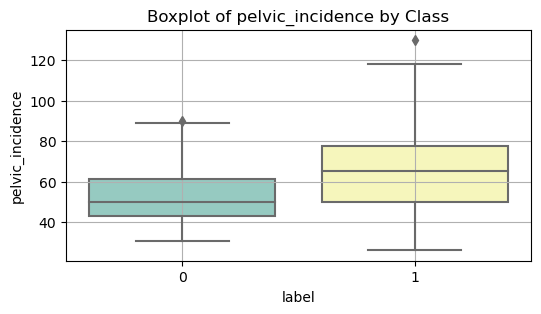

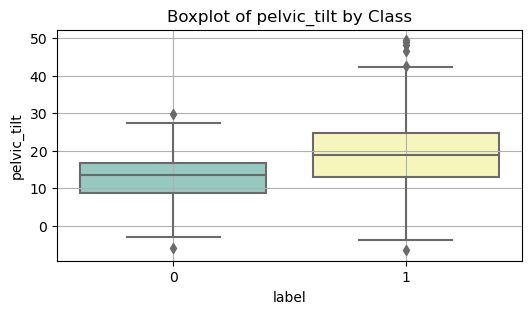

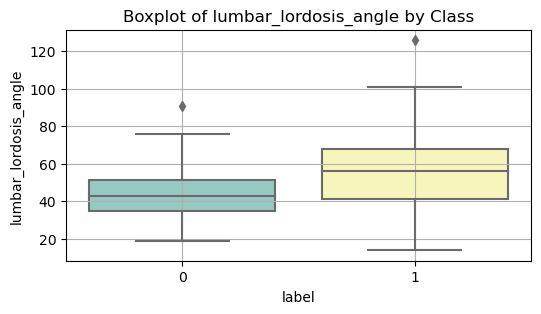

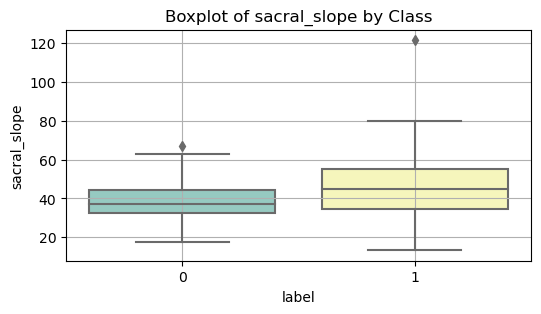

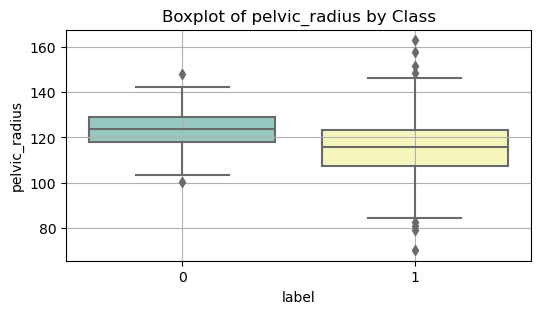

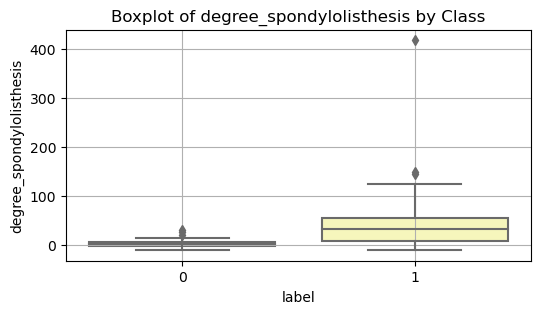

In [24]:
for variable in df_2C.columns[:-2]:  # Exclude the 'class' and 'label' column
    plt.figure(figsize=(6, 3))
    
    sns.boxplot(x='label', y=variable, data=df_2C, palette="Set3")
    
    plt.xlabel('label')
    plt.ylabel(variable)
    plt.title(f'Boxplot of {variable} by Class')
    plt.grid(True)
    
    plt.show()

#### iii. Split Data Set

In [25]:
# Select the training set: first 70 rows of class 0 and first 140 rows of class 1
train_data = pd.concat([class_0_data.head(70), class_1_data.head(140)])

# Select the remaining data as the test set
test_data = df_2C.drop(train_data.index)

### (c) Classification

#### i. Euclidean Metric

In [26]:
# Create a KNN classifier with a specified number of neighbors (e.g., 3 neighbors)
# from sklearn.neighbors import KNeighborsClassifier 
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

#### ii. Test Data

Text(0, 0.5, 'Error Rate')

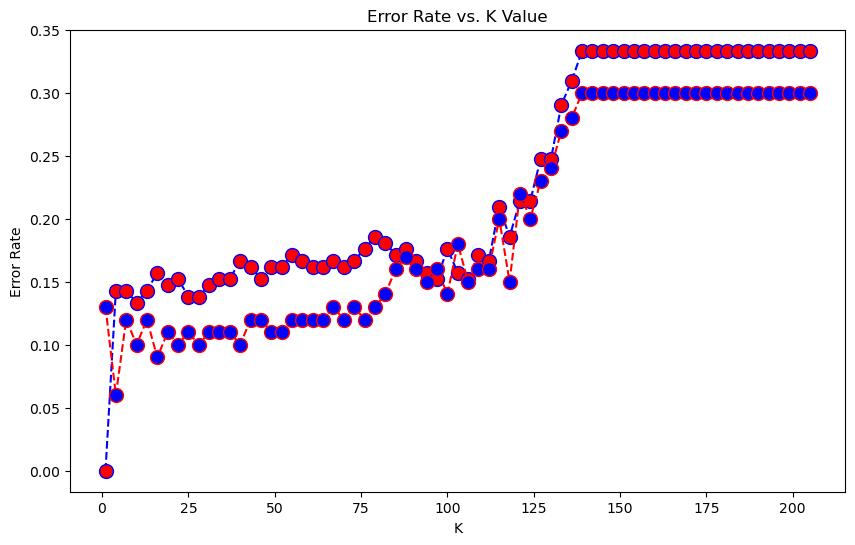

In [27]:
# Preparation: a list of k values
k_values = list(range(1, 208, 3)) 

# Preparation: X,y train & test data
X_train = train_data.iloc[:, :-2]
y_train = train_data['label']

X_test = test_data.iloc[:, :-2]
y_test = test_data['label']

# Preparation: errors
train_errors = []
test_errors = []

# Fit in the data to train and test with different k values to find the best k 
for k in k_values:
        knn = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
        knn.fit(X_train,y_train)

        train_preds = knn.predict(X_train.values)
        test_preds = knn.predict(X_test.values)

        train_error = 1 - accuracy_score(y_train, train_preds)
        test_error = 1 - accuracy_score(y_test, test_preds)

        train_errors.append(train_error)
        test_errors.append(test_error)

# Plot train and test error in terms of k
plt.figure(figsize=(10,6))
plt.plot(range(1, 208, 3),train_errors, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.plot(range(1, 208, 3),test_errors, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [28]:
# Find the smallest test error to determine the k star
k_star = k_values[test_errors.index(min(test_errors))]
print("Minimum test error:",min(test_errors),"at K =",k_star, "\n")

# Use k star to calculate evaluations
knn_star = KNeighborsClassifier(n_neighbors=k_star)
knn_star.fit(X_train, y_train)
test_preds_star = knn_star.predict(X_test)

confusion = confusion_matrix(y_test, test_preds_star) # confusion martrix

tn, fp, fn, tp = confusion.ravel() 
true_positive_rate = tp / (tp + fn) # true positive rate
true_negative_rate = tn / (tn + fp) # true negative rate

precision = precision_score(y_test, test_preds_star) # precision
f1 = f1_score(y_test, test_preds_star) # F1 score

print(f"Most suitable k∗: {k_star}", "\n")
print("Confusion Matrix:")
print(confusion)
print(f"True Positive Rate: {true_positive_rate:.2f}", "\n")
print(f"True Negative Rate: {true_negative_rate:.2f}", "\n")
print(f"Precision: {precision:.2f}", "\n")
print(f"F1-Score: {f1:.2f}")

Minimum test error: 0.06000000000000005 at K = 4 

Most suitable k∗: 4 

Confusion Matrix:
[[25  5]
 [ 1 69]]
True Positive Rate: 0.99 

True Negative Rate: 0.83 

Precision: 0.93 

F1-Score: 0.96


#### iii. Learning Curve

Text(0, 0.5, 'Best Test Eroor Rate')

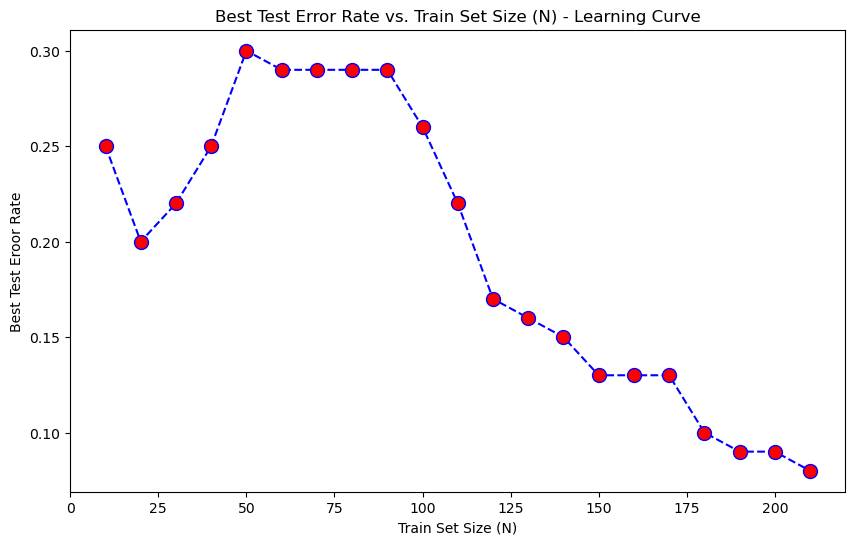

In [29]:
# Train data
k_step = 5  # Step size for k values
training_set_sizes = list(range(10, 211, 10))  # Sizes of the training set (N)
best_test_error_rates = []


for N in training_set_sizes:
    # Select training data based on N
    class_0_subset = class_0_data.head(N // 3)
    class_1_subset = class_1_data.head(N - (N // 3))
    train_data_subset = pd.concat([class_0_subset, class_1_subset])
    X_subset = train_data_subset.iloc[:, :-2]  # Exclue the class and label columns
    y_subset = train_data_subset.iloc[:, -1]  # Labels

    train_errors_subset = []
    test_errors_subset = []

    # Iterate over k values starting from 1, increasing by k_step
    for k in range(1, N + 1, k_step):
        knn = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
        knn.fit(X_subset,y_subset)

        train_preds = knn.predict(X_subset.values)
        test_preds = knn.predict(X_test.values)

        train_error = 1 - accuracy_score(y_subset, train_preds)
        test_error = 1 - accuracy_score(y_test, test_preds)

        train_errors_subset.append(train_error)
        test_errors_subset.append(test_error)
        
    best_test_error = min(test_errors_subset)

    best_test_error_rates.append(best_test_error)

# Plot the best test error rates
plt.figure(figsize=(10,6))
plt.plot(range(10, 211, 10), best_test_error_rates, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Best Test Error Rate vs. Train Set Size (N) - Learning Curve')
plt.xlabel('Train Set Size (N)')
plt.ylabel('Best Test Eroor Rate')

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. chebyshev Distance with p = 1.

In [30]:
manhattan_test_errors = []

k_step = 5  # Step size for k values
for k in range(1, 197, k_step):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)

    test_preds = knn.predict(X_test.values)
    test_error = 1 - accuracy_score(y_test, test_preds)

    manhattan_test_errors.append(test_error)

manhattan_k_star = range(1, 197, k_step)[manhattan_test_errors.index(min(manhattan_test_errors))]
manhattan_test_error_star = min(manhattan_test_errors)
print("Minimum test error:",min(manhattan_test_errors),"at K =",manhattan_k_star, "\n")

Minimum test error: 0.10999999999999999 at K = 1 



##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [31]:
log10p_test_errors = []

for log10p in np.arange(0.1, 1.1, 0.1):
    p = 10 ** log10p
    knn = KNeighborsClassifier(n_neighbors=manhattan_k_star, metric='minkowski', p=p)
    knn.fit(X_train, y_train)
    test_preds = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, test_preds)

    log10p_test_errors.append(test_error)

log10p_star = np.arange(0.1, 1.1, 0.1)[log10p_test_errors.index(min(log10p_test_errors))]
log10p_error_star = min(log10p_test_errors)
print("Minimum test error:", log10p_error_star,"at log10p =", log10p_star, "\n")

Minimum test error: 0.10999999999999999 at log10p = 0.7000000000000001 



##### C. Chebyshev Distance With p -> infinity.

In [32]:
chebyshev_test_errors = []

k_step = 5  # Step size for k values
for k in range(1, 197, k_step):
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)

    test_preds = knn.predict(X_test.values)
    test_error = 1 - accuracy_score(y_test, test_preds)

    chebyshev_test_errors.append(test_error)

chebyshev_k_star = range(1, 197, k_step)[chebyshev_test_errors.index(min(chebyshev_test_errors))]
chebyshev_test_error_star = min(chebyshev_test_errors)
print("Minimum test error:",min(chebyshev_test_errors),"at K =",chebyshev_k_star, "\n")


Minimum test error: 0.07999999999999996 at K = 16 



#### ii. Mahalanobis Distance.

In [33]:
mahalanobis_test_errors = []

k_step = 5  # Step size for k values
for k in range(1, 197, k_step):
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': np.linalg.inv(np.cov(X_train.T))})
    knn.fit(X_train, y_train)

    test_preds = knn.predict(X_test.values)
    test_error = 1 - accuracy_score(y_test, test_preds)

    mahalanobis_test_errors.append(test_error)

mahalanobis_k_star = range(1, 197, k_step)[mahalanobis_test_errors.index(min(mahalanobis_test_errors))]
mahalanobis_test_error_star = min(mahalanobis_test_errors)
print("Minimum test error:",min(mahalanobis_test_errors),"at K =",mahalanobis_k_star, "\n")


Minimum test error: 0.14 at K = 1 



In [34]:
# Combine all k stars and test error into one table
result_table = pd.DataFrame({
    'Metric': ['Manhattan', 'Minkowski', 'Chebyshev', 'Mahalanobis'],
    'Best k': [manhattan_k_star, "Manhattan", chebyshev_k_star, mahalanobis_k_star],
    'Best Test Error': [manhattan_test_error_star, log10p_error_star, chebyshev_test_error_star, mahalanobis_test_error_star]
})

print(result_table, "\n")
print(f"Best log10(p) for Minkowski Distance: {log10p_star}")

        Metric     Best k  Best Test Error
0    Manhattan          1             0.11
1    Minkowski  Manhattan             0.11
2    Chebyshev         16             0.08
3  Mahalanobis          1             0.14 

Best log10(p) for Minkowski Distance: 0.7000000000000001


### (e) Weighted Decision

In [35]:
k_step = 5  # Step size for k values
k_values = list(range(1, 197, k_step))  # List of k values

euc_test_errors = []
man_test_errors = []
che_test_errors = []

for k in k_values:
    for distance_metric in ['euclidean', 'manhattan', 'chebyshev']:
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric, weights='distance')
        knn.fit(X_train, y_train)
        test_preds = knn.predict(X_test.values)
        test_error = 1 - accuracy_score(y_test, test_preds)

        if distance_metric == 'euclidean':
            euc_test_errors.append(test_error)
        elif distance_metric == 'manhattan':
            man_test_errors.append(test_error)
        elif distance_metric == 'chebyshev':
            che_test_errors.append(test_error)

best_test_errors_euclidean = min(euc_test_errors)
k_star_euclidean = k_values[euc_test_errors.index(min(euc_test_errors))]

best_test_errors_manhattan = min(man_test_errors)
k_star_manhatta = k_values[man_test_errors.index(min(man_test_errors))]

best_test_errors_chebyshev = min(che_test_errors)
k_star_chebyshev = k_values[che_test_errors.index(min(che_test_errors))]


In [36]:
# print out the results
result_table_2 = pd.DataFrame({
    'Metric': ['Euclidean', 'Manhattan', 'Chebyshev'],
    'Best k': [k_star_euclidean, k_star_manhatta, k_star_chebyshev],
    'Best Test Error': [best_test_errors_euclidean, best_test_errors_manhattan, best_test_errors_chebyshev]
})
print(result_table_2)

      Metric  Best k  Best Test Error
0  Euclidean       6             0.10
1  Manhattan      26             0.10
2  Chebyshev      16             0.11


### (f) Training Error Rate

The lowest training error rate I achieved in this homework is 0, which is from the 1 (c) ii.